In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates
%pip install mplfinance
import mplfinance as mpf

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
df_solana=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Solana.csv")
print(df_solana.head())

   SNo    Name Symbol                 Date      High       Low      Open  \
0    1  Solana    SOL  2020-04-11 23:59:59  1.049073  0.765020  0.951054   
1    2  Solana    SOL  2020-04-12 23:59:59  0.956670  0.762426  0.785448   
2    3  Solana    SOL  2020-04-13 23:59:59  0.891603  0.773976  0.890760   
3    4  Solana    SOL  2020-04-14 23:59:59  0.796472  0.628169  0.777832   
4    5  Solana    SOL  2020-04-15 23:59:59  0.704964  0.621531  0.669289   

      Close        Volume  Marketcap  
0  0.776819  4.386244e+07        0.0  
1  0.882507  3.873690e+07        0.0  
2  0.777832  1.821129e+07        0.0  
3  0.661925  1.674761e+07        0.0  
4  0.646651  1.307528e+07        0.0  


In [3]:
df_solana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        452 non-null    int64  
 1   Name       452 non-null    object 
 2   Symbol     452 non-null    object 
 3   Date       452 non-null    object 
 4   High       452 non-null    float64
 5   Low        452 non-null    float64
 6   Open       452 non-null    float64
 7   Close      452 non-null    float64
 8   Volume     452 non-null    float64
 9   Marketcap  452 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 35.4+ KB


In [4]:
df_solana.shape

(452, 10)

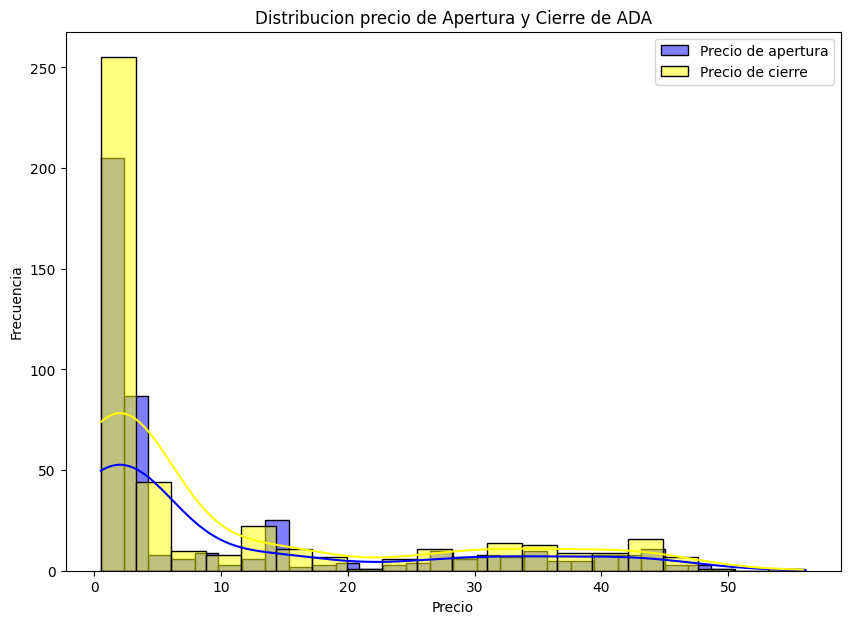

In [5]:
plt.figure(figsize=(10,7))
sns.histplot(df_solana['Open'], bins=30, color='blue',kde=True , label= 'Precio de apertura')
sns.histplot(df_solana['Close'], bins=20, color= 'yellow',kde= True, label='Precio de cierre')
plt.title('Distribucion precio de Apertura y Cierre de ADA')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

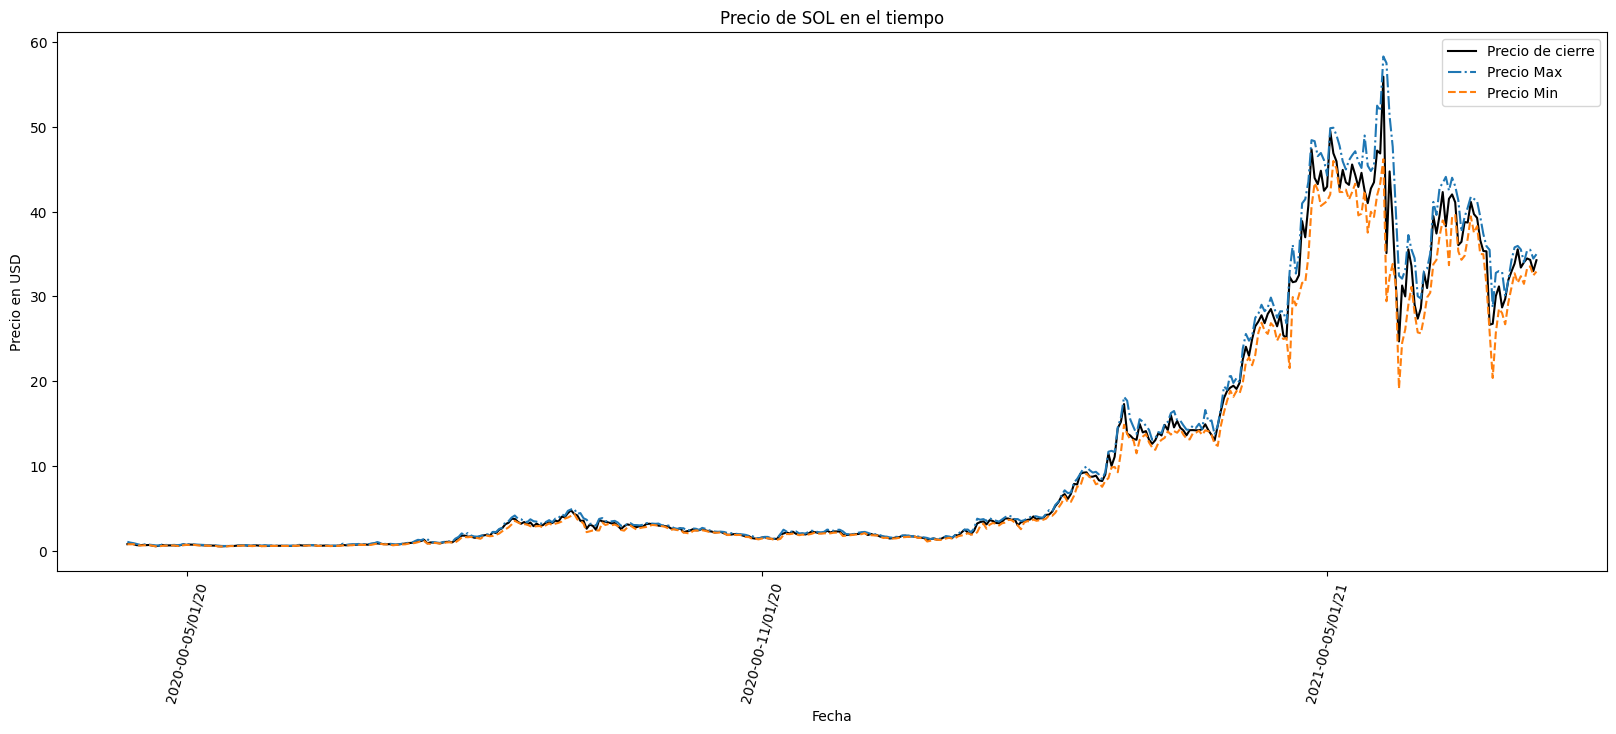

In [10]:
plt.figure(figsize=(20,7))
plt.plot (df_solana['Date'], df_solana ['Close'], color= 'black', label='Precio de cierre') #cambiar color 
plt.plot(df_solana ['Date'], df_solana['High'], label='Precio Max', linestyle='-.')
plt.plot(df_solana['Date'], df_solana['Low'], label='Precio Min', linestyle='--')
plt.title('Precio de SOL en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=75)
plt.legend()
plt.show()

In [7]:
df_solana['Date']= pd.to_datetime(df_solana['Date'])

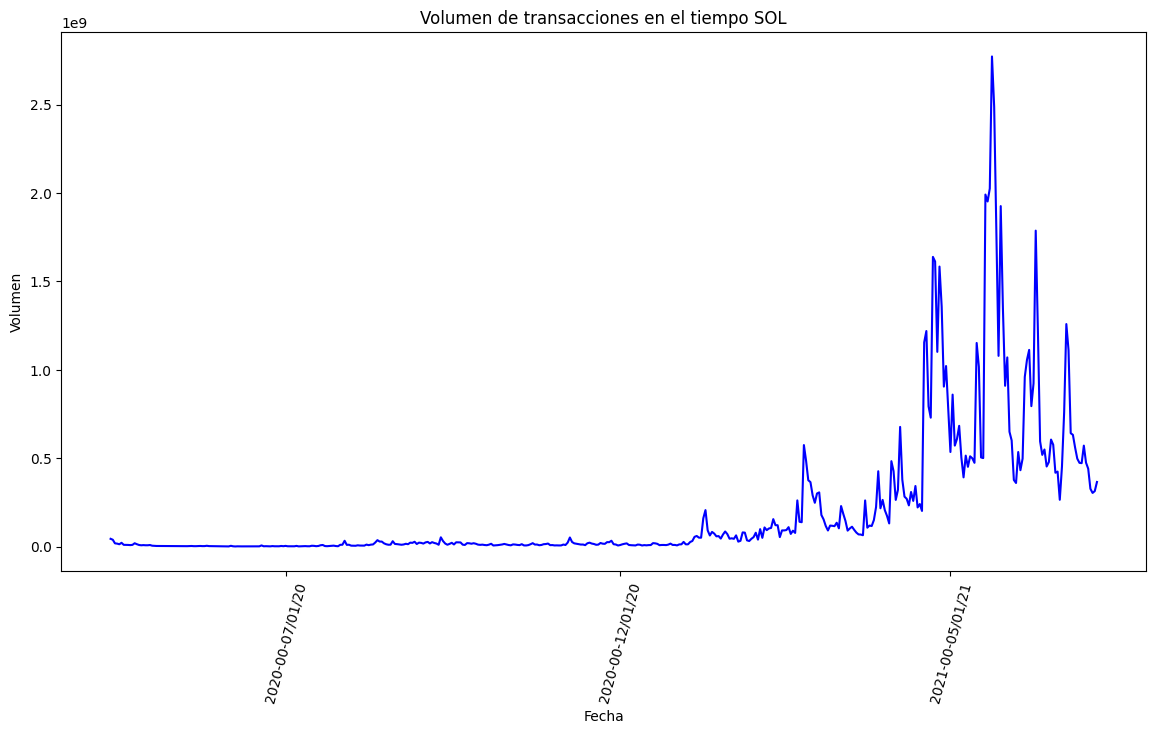

In [11]:
plt.figure(figsize=(14,7))
plt.plot(df_solana['Date'], df_solana['Volume'], color='blue')
plt.title('Volumen de transacciones en el tiempo SOL')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.xticks(rotation=75)
plt.show()

In [12]:
df_solana.set_index('Date',inplace=True)

In [13]:
ethereum_mensual = df_solana.resample('M').agg({
    'Open': 'first',       # Primer valor del mes.
    'High': 'max',         # Máximo valor del mes.
    'Low': 'min',          # Mínimo valor del mes.
    'Close': 'last',       # Último valor del mes.
    'Volume': 'sum',       # Suma del volumen para el mes.
    'Marketcap': 'last'    # Último valor de la capitalización.
})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16296\2476149413.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ethereum_mensual = df_solana.resample('M').agg({


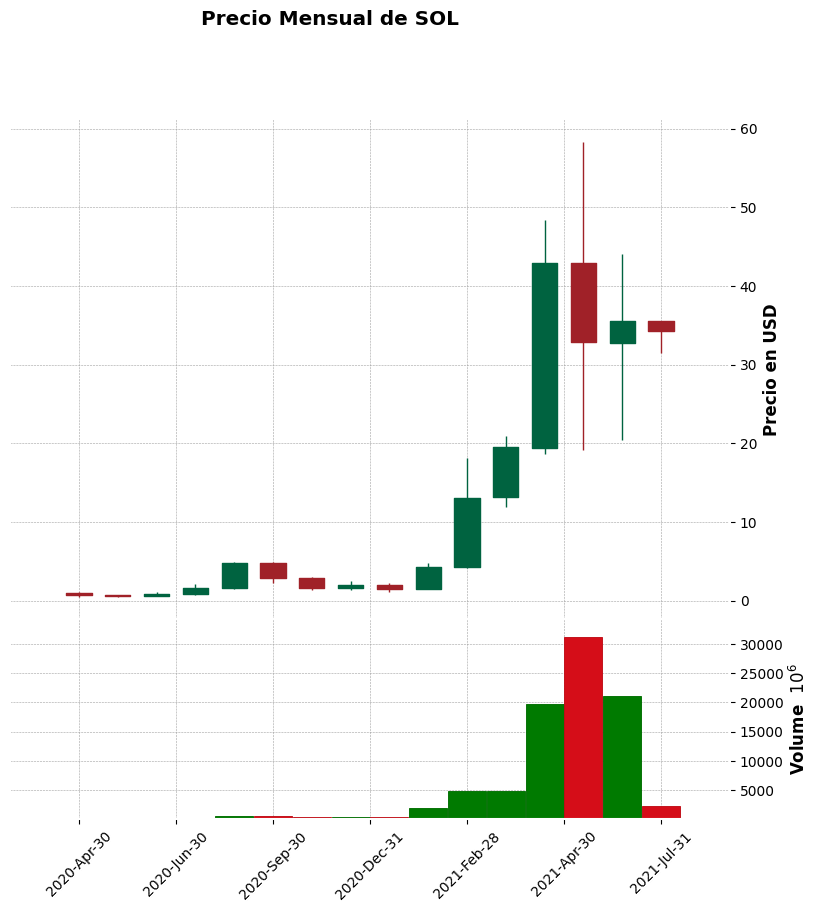

In [15]:
mpf.plot(ethereum_mensual, type='candle', style='charles',
         title='Precio Mensual de SOL',
         ylabel='Precio en USD',
         volume=True,
         figsize=(10, 10))